### Important Libraries for image pre-processing and visualisation.

In [1]:
import pickle
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt 
import random

## Image Segmentation.

In [2]:
trainingData = None 
testingData = None
validationData = None

In [3]:
with open("./TTVSplit/tr.pkl", "rb") as file:
    trainingData = pickle.load(file)

with open("./TTVSplit/te.pkl", "rb") as file:
    testingData = pickle.load(file)

with open("./TTVSplit/val.pkl", "rb") as file:
    validationData = pickle.load(file)

In [4]:
X_test = testingData['imagesData']
X_train = trainingData['imagesData']
X_valid = np.array(validationData['imagesData'])

### *Binary Segmentation.*

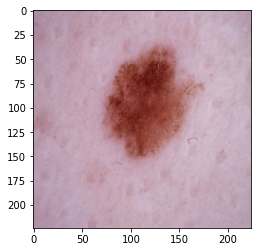

In [6]:
random_index = random.randrange(400)
random_image = X_train[random_index]
plt.imshow(random_image)
plt.show()

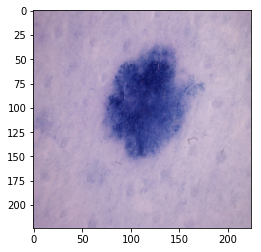

In [7]:
gray = cv.cvtColor(random_image, cv.COLOR_BGR2RGB)
plt.imshow(gray)
plt.show()

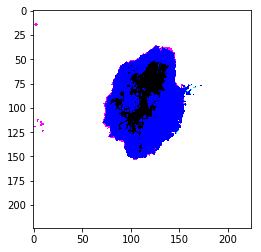

In [8]:
r, b_seg = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)
plt.imshow(b_seg)
plt.show()

### Image Segmentation to batches of X_train, X_test and X_valid.

In [30]:
def binary_thresh(X_array):
    segmented_images = []
    for X in X_array:
        image = X 
        gray = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        r, b_seg = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)
        segmented_images.append(b_seg)
    return np.array(segmented_images) 

In [10]:
X_train_seg = binary_thresh(X_train)

### Before Segmentation

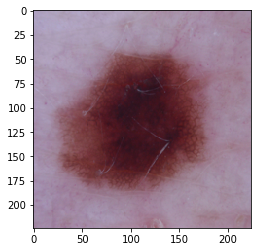

In [11]:
plt.imshow(X_train[12])
plt.show()

### After Segmentation

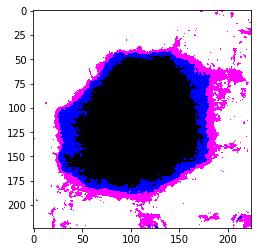

In [12]:
plt.imshow(X_train_seg[12], cmap= "gray")
plt.show()

### Visualisation of all the images 

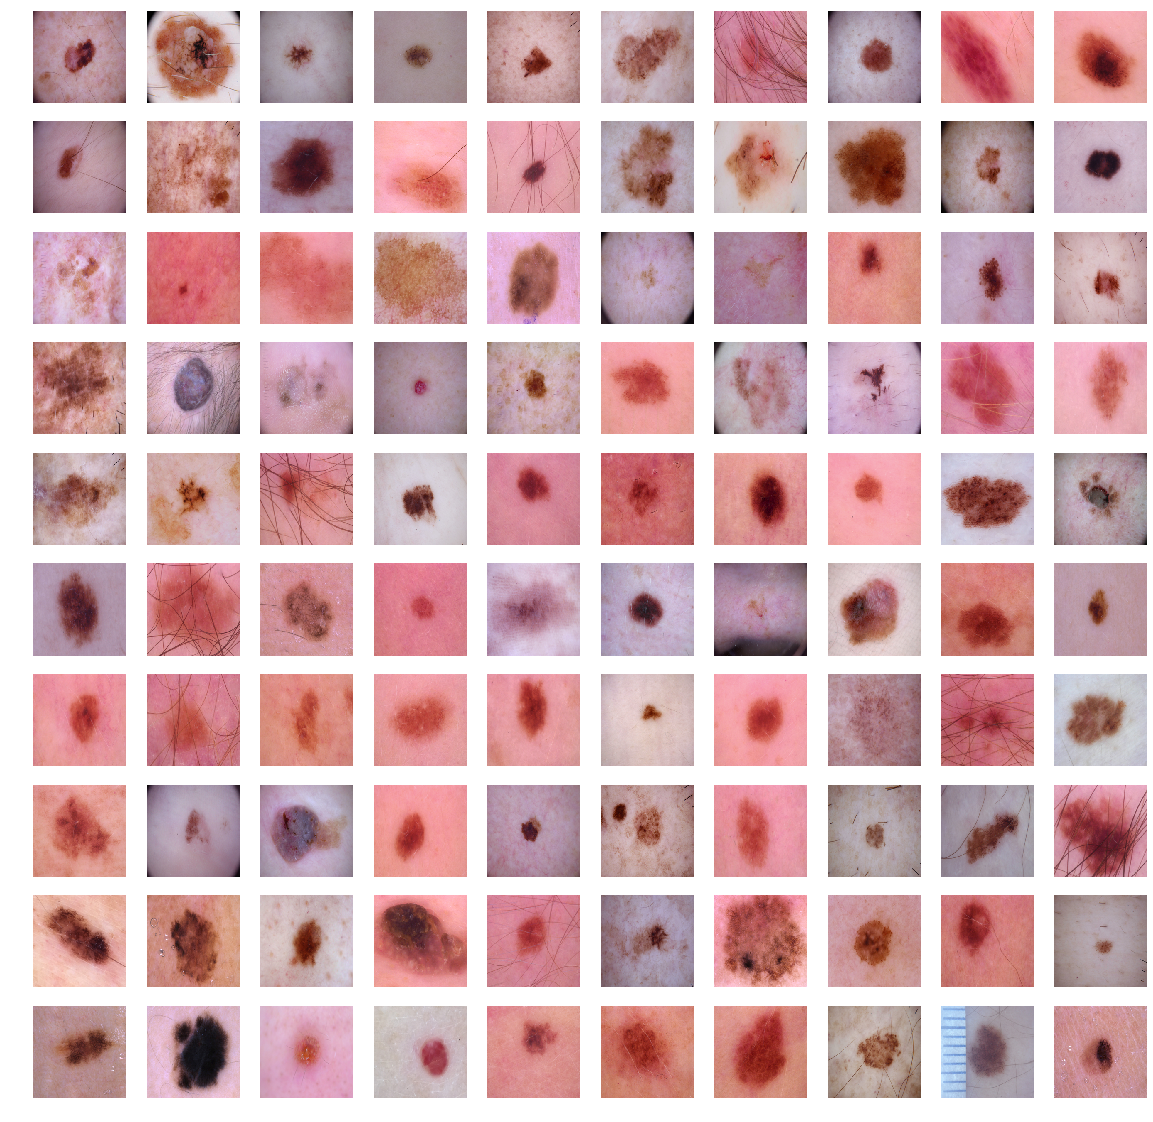

In [15]:
L = 10 
W = 10
fig, axes = plt.subplots(L, W, figsize = (20, 20))
axes = axes.ravel()
for i in np.arange(0, L * W):
    axes[i].imshow(X_train[i])
    axes[i].axis('off')
#plt.subplots_adjust(wspace=1)

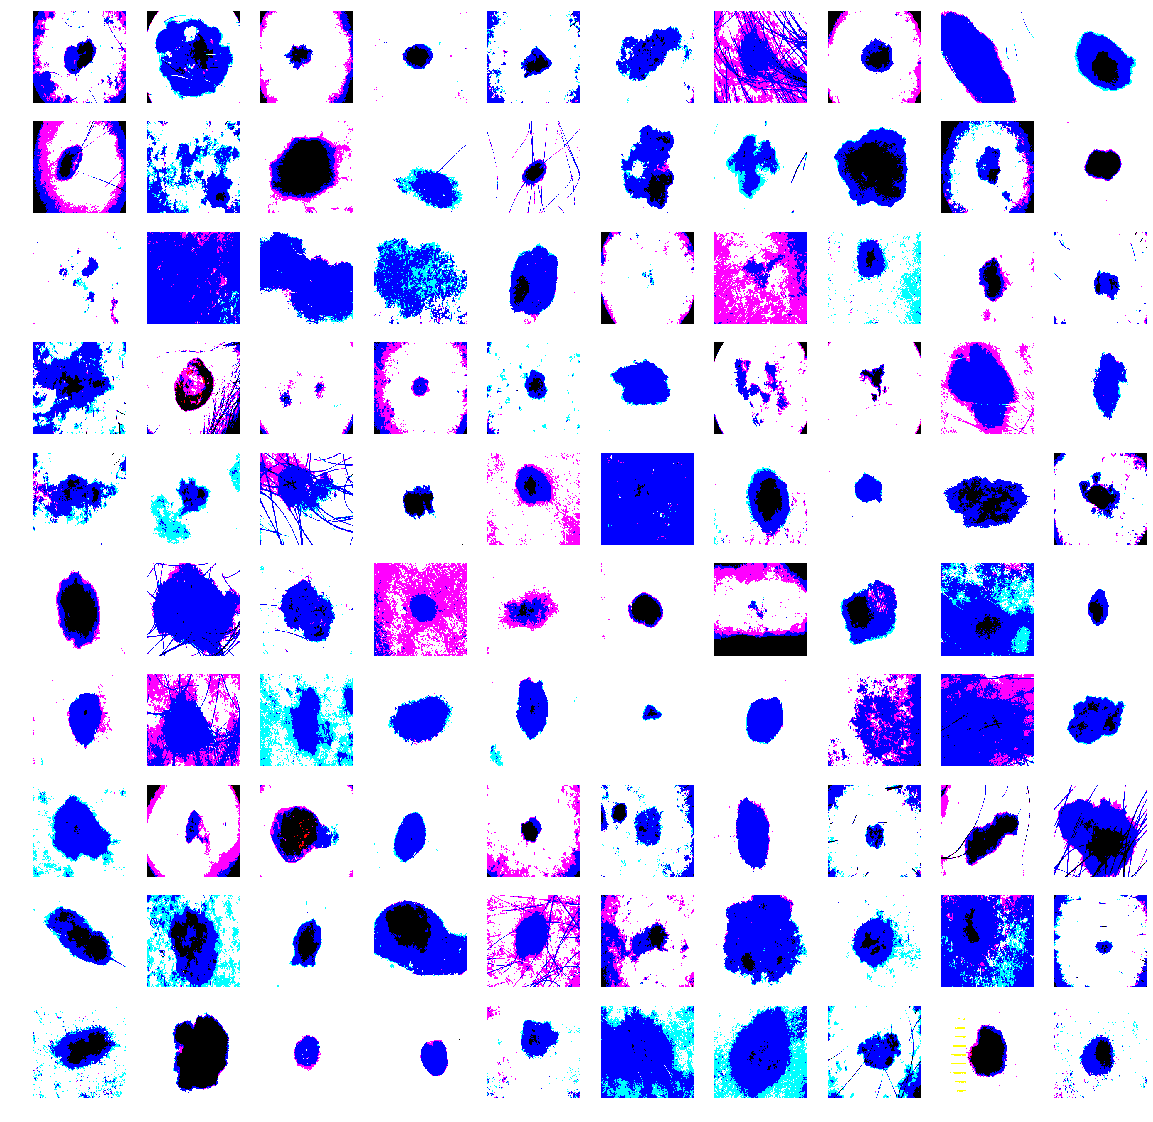

In [16]:
L = 10 
W = 10
fig, axes = plt.subplots(L, W, figsize = (20, 20))
axes = axes.ravel()
for i in np.arange(0, L * W):
    axes[i].imshow(X_train_seg[i], cmap='gray')
    axes[i].axis('off')

### Testing Data

In [92]:
X_test_seg = binary_thresh(X_test)

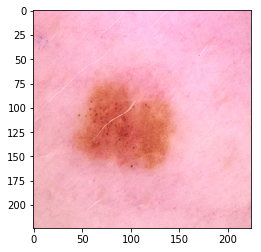

In [93]:
plt.imshow(X_test[12])
plt.show()

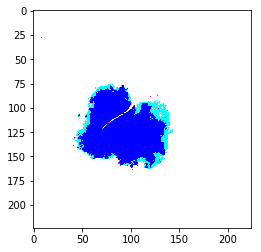

In [94]:
plt.imshow(X_test_seg[12], cmap="gray")
plt.show()

### Validation Data

In [95]:
X_valid_seg = binary_thresh(X_valid)

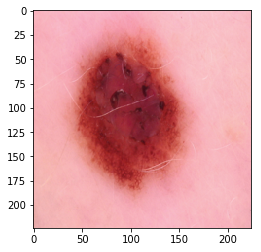

In [96]:
plt.imshow(X_valid[12])
plt.show()

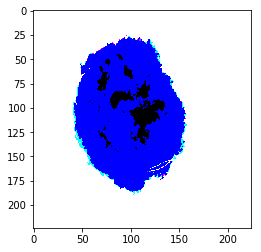

In [97]:
plt.imshow(X_valid_seg[12], cmap="gray")
plt.show()

### Exporting Segmentation Data

In [98]:
with open("segmentation.pkl", "wb") as file:
    data = {
        "X_train": X_train_seg,
        "X_valid": X_valid_seg,
        "X_test": X_test_seg,
    }
    pickle.dump(data, file)

# Image Segmentation for 32 * 32 pixel Pigmented skin lesions.

In [24]:
train_image_data32 = None
with open('./train32.pkl', 'rb') as file:
    train_image_data32 = pickle.load(file)
    
test_image_data32 = None
with open('./test32.pkl', 'rb') as file:
    test_image_data32 = pickle.load(file)

valid_image_data32 = None
with open('./val32.pkl', 'rb') as file:
    valid_image_data32 = pickle.load(file)

In [27]:
X_train32 = train_image_data32['imagesData']
X_test32 = test_image_data32['imagesData']
X_valid32 = valid_image_data32['imagesData']
X_valid32 = np.array(X_valid32)

In [29]:
print("X_train_32{}".format(X_train32.shape))
print("X_test_32{}".format(X_test32.shape))
print("X_valid_32{}".format(X_valid32.shape))

X_train_32(6522, 32, 32, 3)
X_test_32(1812, 32, 32, 3)
X_valid_32(725, 32, 32, 3)


[]

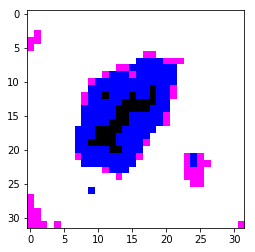

In [37]:
X_train32_seg = binary_thresh(X_train32)
X_test32_seg = binary_thresh(X_test32)
X_valid32_seg = binary_thresh(X_valid32)

# Exporting Data

In [39]:
with open("segmentation_32.pkl", "wb") as file:
    data = {
        "X_train": X_train32_seg,
        "X_valid": X_valid32_seg,
        "X_test": X_test32_seg,
    }
    pickle.dump(data, file)